In [ ]:
%load_ext autoreload
%autoreload 2

from AIETHICS.src.hiring_cv_bias.utils import load_data
from utils import localize
from visualize import plot_histogram
import polars as pl
from AIETHICS.src.hiring_cv_bias.config import PARSED_DATA_PATH, REVERSE_MATCHING_PATH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df_skills = load_data(PARSED_DATA_PATH, load_excel=False)
df_info_candidates = load_data(REVERSE_MATCHING_PATH, sheet='Candidates', load_excel=True)

In [5]:
df_skills.head()

CANDIDATE_ID,Skill,Skill_Type
i64,str,str
7990324,"""Computer Literacy""","""IT_Skill"""
7990324,"""Dental Assistant (m/f)""","""Job_title"""
7990324,"""General Labourer (other) (m/f)""","""Job_title"""
7990324,"""Intern (m/f)""","""Job_title"""
7990324,"""Italian""","""Language_Skill"""


In [7]:
df_info_candidates

CANDIDATE_ID,Gender,Age_bucket,professional_categories_int,matterknowledges,languages,regulatedtrainings,candidatecity,drivinglicenses,LONGITUDE,LATITUDE,experience
i64,str,str,str,str,str,str,str,str,f64,f64,str
7990324,"""Female""","""55-74""","""Impiegato (m/f)""","""Attività di back office call c…","""Inglese;Italiano;Francese""","""Tecnico dei servizi commercial…","""FORMIGINE""","""B""",10.847028,44.575143,"""general labourer (other);assis…"
7974050,"""Female""","""55-74""","""commesso di punto vendita/shop…",null,null,"""Ragioneria""","""TAVULLIA""","""B""",12.75479,43.897756,"""segretario amministrativo;impi…"
7965670,"""Female""","""55-74""","""addetto all'amministrazione de…",null,"""Italiano""",null,"""CAVALLERLEONE""",null,7.663928,44.740139,"""assistenza sanitaria (altro);c…"
7960501,"""Male""","""25-34""","""magazziniere/magazziniera""","""Lavorazione del legno;Lettura …","""Italiano""",null,"""RONCELLO""",null,9.4576108,45.602443,"""magazziniere;pizzaiolo;food se…"
7960052,"""Female""","""55-74""","""addetto al ricevimento/addetta…",null,null,null,"""PISA""",null,10.401862,43.715939,"""social service assistant;addet…"
…,…,…,…,…,…,…,…,…,…,…,…
25333,"""Female""","""55-74""","""Addetto al Confezionamento Far…","""Attività generiche di produzio…","""Italiano""","""Licenza media""","""CORREZZANA""","""B""",9.3036259,45.665689,"""pharmaceutical packaging worke…"
23851,"""Male""","""25-34""","""analista programmatore;manuten…","""Attività generiche di produzio…","""Inglese""","""Perito in Elettronica ed Elett…","""MONDOVI'""","""B""",7.8204718,44.390028,"""addetto di inventario;montator…"
22755,"""Male""","""25-34""","""addetto alla logistica/addetta…","""Utilizzo muletto / carrello el…","""Inglese""","""Perito in Elettronica ed Elett…","""VEROLI""","""B""",13.41763,41.691274,"""dipendente controllo qualità;m…"


In [8]:
df_info_candidates.null_count()

CANDIDATE_ID,Gender,Age_bucket,professional_categories_int,matterknowledges,languages,regulatedtrainings,candidatecity,drivinglicenses,LONGITUDE,LATITUDE,experience
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,8,3940,4146,4280,0,3701,0,0,2


In [9]:
df_skill_candidates = df_info_candidates.join(df_skills, on='CANDIDATE_ID', how='inner').select('CANDIDATE_ID', 'LATITUDE', 'Skill', 'Skill_Type')
display(df_skill_candidates)

CANDIDATE_ID,LATITUDE,Skill,Skill_Type
i64,f64,str,str
7990324,44.575143,"""Computer Literacy""","""IT_Skill"""
7990324,44.575143,"""Dental Assistant (m/f)""","""Job_title"""
7990324,44.575143,"""General Labourer (other) (m/f)""","""Job_title"""
7990324,44.575143,"""Intern (m/f)""","""Job_title"""
7990324,44.575143,"""Italian""","""Language_Skill"""
…,…,…,…
18233,45.060169,"""Knowledge of Finance""","""Professional_Skill"""
18233,45.060169,"""Maintenance""","""Professional_Skill"""
18233,45.060169,"""Multi-Level Marketing""","""Professional_Skill"""


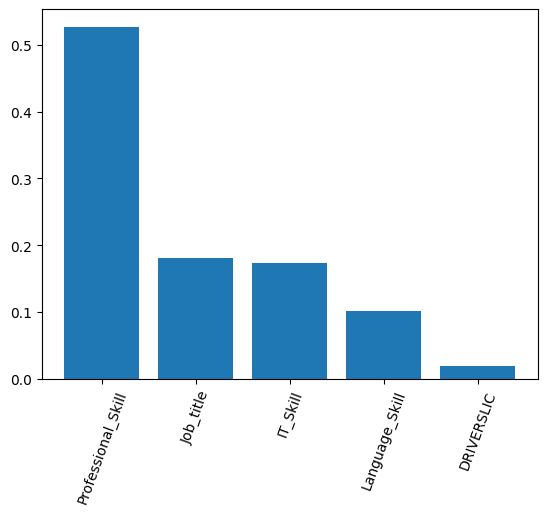

In [10]:
plot_histogram(df_skill_candidates['Skill_Type'], normalize=True)

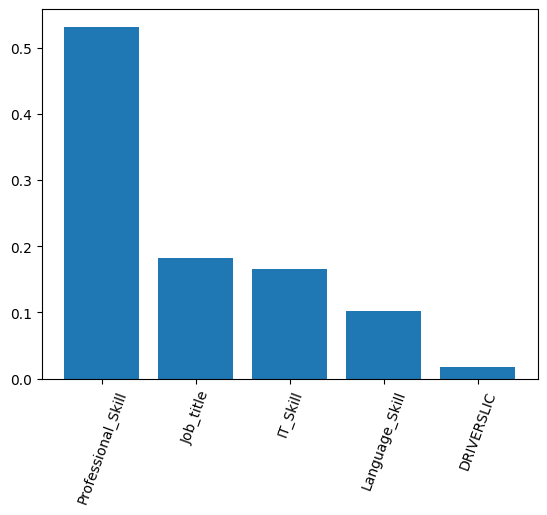

In [11]:
df_skill_candidates = df_skill_candidates.with_columns(pl.col('LATITUDE').map_elements(localize, return_dtype=pl.String).alias('LATITUDE'))
df_north = df_skill_candidates.filter(pl.col('LATITUDE') == 'NORTH')
plot_histogram(df_north['Skill_Type'], normalize=True)

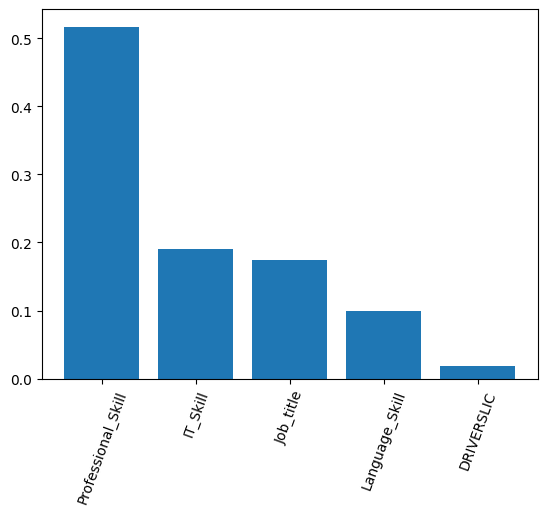

In [12]:
df_center = df_skill_candidates.filter(pl.col('LATITUDE') == 'CENTER')
plot_histogram(df_center['Skill_Type'], normalize=True)

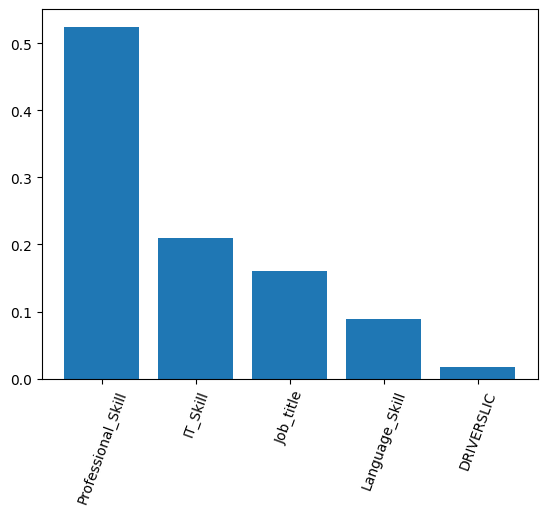

In [13]:
df_south = df_skill_candidates.filter(pl.col('LATITUDE') == 'SOUTH')
plot_histogram(df_south['Skill_Type'], normalize=True)

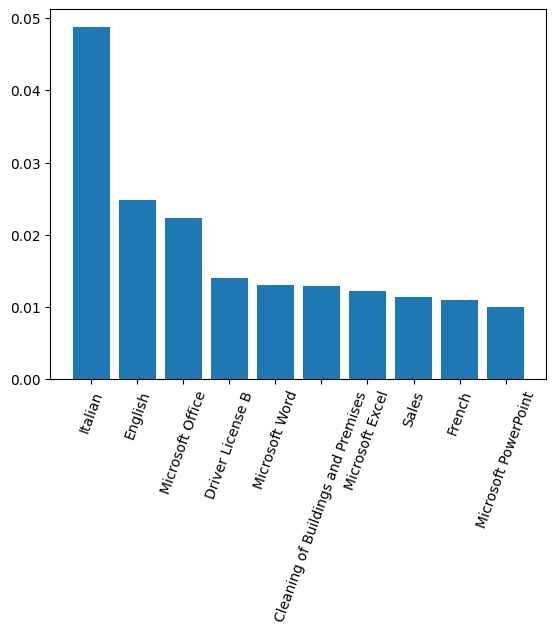

In [14]:
plot_histogram(df_skill_candidates['Skill'].drop_nulls(), normalize=True)

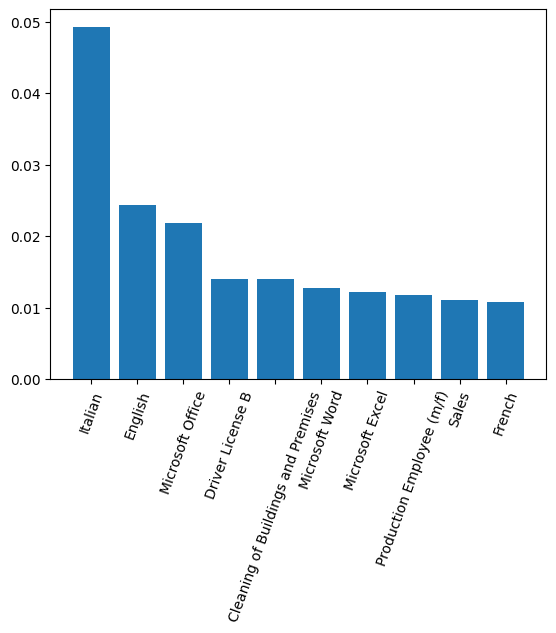

In [15]:
plot_histogram(df_north['Skill'].drop_nulls(), normalize=True)